In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib notebook
from  matplotlib import pyplot as plt
import random
import time

In [2]:
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
print(data.head())
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [3]:
l = data.l.values
t = data.t.values
tsq = t * t

stochastic gradient descent

 $y_i = mx_i + c$

$E$ = $(y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $ -(y - (mx_i + c)) * x_i$

$\frac{\partial E }{\partial c}$ = $ -(y - (mx_i + c))$

$m'$ = $m - \frac{\partial E }{\partial m}\eta$

$c'$ = $c - \frac{\partial E }{\partial c}\eta$

In [4]:
def next_step(x,y,m,c,eta):
    ybar = m * x + c
    E = (y - ybar) ** 2
    dEdm = -(y - (m * x + c)) * x
    dEdc = -(y - (m * x + c))
    m = m - dEdm * eta
    c = c - dEdc * eta
    return m,c,E

In [5]:
def one_loop_random(x,y,m,c,eta): #vanilla gradient descent
    random_idx = np.arange(len(y)) #create np array of indices from 0 to len(y) - 1
    np.random.shuffle(random_idx) #function to shuffle values in random_idx
    for idx in random_idx:
        m,c,e = next_step(x[idx],y[idx],m,c,eta)
    return m,c,e

In [6]:
def one_loop_sequential(x,y,m,c,eta): #sequential descent
    sequential_idx = np.arange(len(y)) #create np array of indices from 0 to len(y) - 1
    for idx in sequential_idx:
        m,c,e = next_step(x[idx],y[idx],m,c,eta)
    return m,c,e

In [7]:
def train_stochastic(x,y,m,c,eta,itr=1000,r=True):
    for i in range(itr):
        if r:
            m,c,err = one_loop_random(x,y,m,c,eta)
        else:
            m,c,err = one_loop_sequential(x,y,m,c,eta)
    return m,c,err

TRAIN

In [8]:
m,c,lr = 0,0,0.001

In [9]:
%matplotlib inline

remote\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


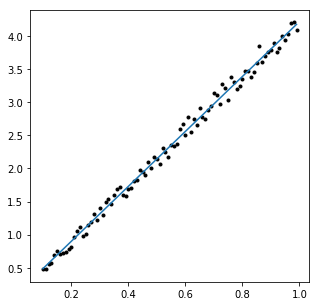

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, itr=100) # We will plot the error values for every 100 iterations
    #print(m, c, error)
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    #time.sleep(1)

for random values of lr between 0.0001 and 0.1

In [11]:
def plot_graph(lr, ax, r):
    m,c = 0,0
    for num in range(10):
        m,c,err = train_stochastic(l,tsq,m,c,lr,itr=100, r=r)
        ax.plot(l,tsq, '.k')
    ax.plot(l,y) #unindent to draw all line
    fig.canvas.draw() #unindent to draw all line
    ax.text(0.7,0.1,'lr=' + str(lr),style='italic',transform=ax.transAxes,ha='center')

In [12]:
import math

In [13]:
lr_list = [x/1000 for x in random.sample(range(1,1000),14)] #create list of random lr bretween 0.0001 and 0.1
dimx = 2
dimy = math.floor(len(lr_list)/dimx) #creating a dimx x dimy dimenion grid for subplots

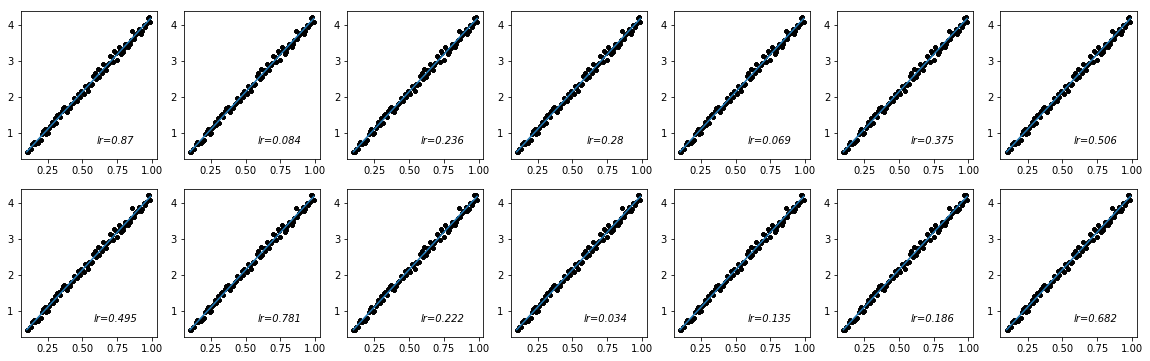

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(20,6))

i = 1
for lr in lr_list:
    ax = fig.add_subplot(dimx,dimy,i)
    i += 1
    plot_graph(lr,ax,True)
plt.ion()
fig.show()
fig.canvas.draw()

In [15]:
lr_list[:5]

[0.87, 0.084, 0.236, 0.28, 0.069]

plotting errors vs iterations

3


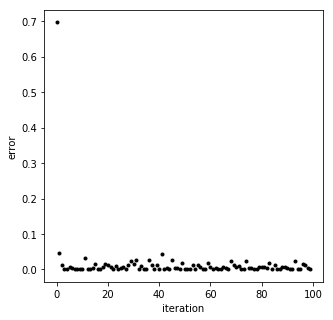

In [16]:
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel('iteration')
ax.set_ylabel('error')

plt.ion()
fig.show()
fig.canvas.draw()
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
flag = True
# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for times in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, itr=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
    if error <= 0.004 and flag:
        print(times)
        flag=False
    #ax.clear()
    ax.plot(times, error, '.k')
    fig.canvas.draw()

4


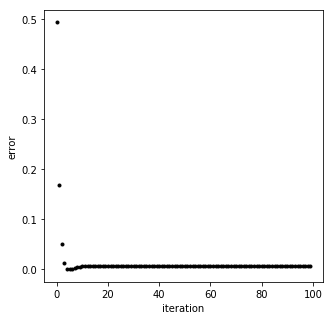

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel('iteration')
ax.set_ylabel('error')

plt.ion()
fig.show()
fig.canvas.draw()
ms, cs,errs_seq = [], [], []
m, c = 0, 0
lr = 0.001
flag=True
for times in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, itr=100,r=False) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
    if error <= 0.004 and flag:
        print(times)
        flag=False
    #ax.clear()
    ax.plot(times, error, '.k')
    fig.canvas.draw()

mini batch gradient descent

$y_i = mx_i + c$
        
$E$ =$\frac{1}{n}$   $\sum_{i=1}^n (y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -x_i(y - (mx_i + c))$
 
$\frac{\partial E}{\partial c}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -(y - (mx_i + c))$

In [18]:
def train_one_batch(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

In [19]:
def train_batches(x, y, m, c, eta, batch_size):
    # Making the batches
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    err = []
    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[batch*batch_size:(batch+1)*batch_size]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)
    
    return m, c, err

In [20]:
def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_batches(x, y, m, c, eta, batch_size)
    return m, c, err

TRAIN

In [21]:
m,c,lr = 0,0,0.001

In [22]:
batch_size = 10

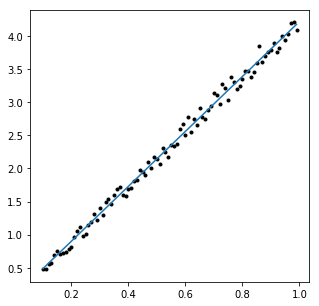

In [23]:
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(1000):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100) # We will plot the error values for every 100 iterations
    #print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    #time.sleep(1)

In [24]:
print(m,c)

4.1413787314494375 0.07364116282546357


In [25]:
def plot_points(lr, batch_size, ax):
  m, c = 0, 0
  for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100)
    y = m * l + c
    ax.plot(l, tsq, '.k')
  ax.plot(l, y)     #if indented, will show all lines during the iteration
  fig.canvas.draw() #if indented, will show all lines during the iteration
  ax.text(0.7, 0.1, 'lr=' + str(lr), style='italic', transform=ax.transAxes, ha='center')
  ax.text(0.5, 0.3,'batch_size=' + str(batch_size), ha='center')

varying lr

remote\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
remote\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  


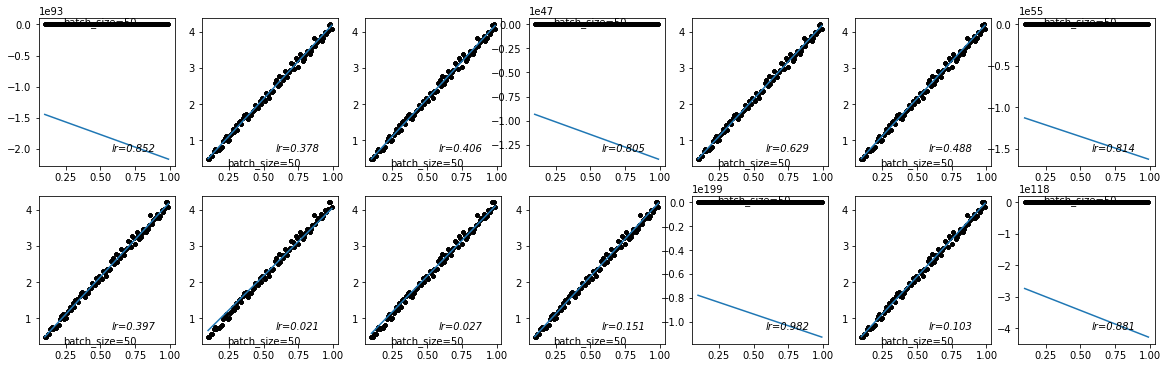

In [26]:
%matplotlib inline

fig = plt.figure(figsize=(20, 6))
import random as rand
import math
lr_list = [x/1000 for x in random.sample(range(1, 1000), 14)]#random.sample(range(0.001, 0.1))
dimx = 2
dimy = math.floor(len(lr_list) / 2)
i = 1
for lr in lr_list:
  ax = fig.add_subplot(dimx,dimy,i)
  i += 1
  plot_points(lr, 50, ax)
plt.ion()
fig.show()
fig.canvas.draw()

varying batch size

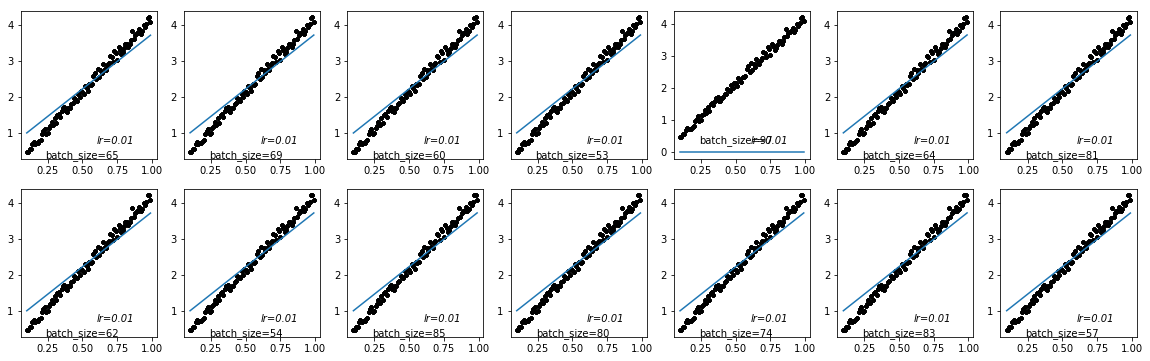

In [27]:
%matplotlib inline

fig = plt.figure(figsize=(20, 6))
import random as rand
import math
batch_list = [x for x in random.sample(range(50, 100), 14)]
dimx = 2
dimy = math.floor(len(lr_list) / 2)
i = 1
for batch_size in batch_list:
  ax = fig.add_subplot(dimx,dimy,i)
  i += 1
  plot_points(0.01, batch_size, ax)
plt.ion()
fig.show()
fig.canvas.draw()

error vs iterations

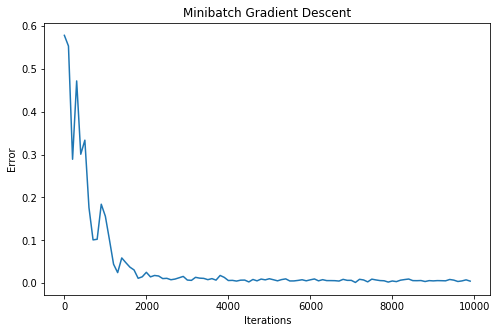

In [28]:
%matplotlib inline

ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
batch_size = 10

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size = 10.
for times in range(100):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    
    errs.append(error)
    
# plot Errors vs Iterations
epoch = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Minibatch Gradient Descent")
plt.show()